In [2]:
import os
import csv

cwd = os.getcwd()
DATA_PATH = '/kik_knet_data'
ALL_DATA_PATH = f'{DATA_PATH}/all_data'
RAW_DATA_PATH = f'{ALL_DATA_PATH}/selecteddata'


attrs = [
    'origin_time', 'latitude', 'longitude', 'depth', 'magnitude',
    'station_code', 'station_latitude', 'station_longitude', 'station_height',
    'record_time', 'sampling_frequency', 'duration_time', 'channel_number',
    'scale_factor', 'max_acceleration', 'last_correction'
]
time_attrs = ['origin_time', 'record_time', 'duration_time', 'last_correction']

def get_file_data(file_path):
    result = {}
    line_number = 0
    strong_motion_data = []
    with open(file_path) as f:
        line = f.readline()
        while line:
            line = line.replace('\n', '')
            splitted_line = line.split(' ')
            if line_number <  len(attrs):
                attr = attrs[line_number]
                if attr in time_attrs:
                    result[attr] = f'{splitted_line[-2]} {splitted_line[-1]}'
                else:
                    result[attr] = f'{splitted_line[-1]}'
            elif ('Memo.' not in line) and line_number >= len(attr):
                for data in splitted_line:
                    if not data: continue
                    strong_motion_data.append(data)

            line = f.readline()
            line_number += 1
        result['strong_motion_data'] = strong_motion_data
        # result['strong_motion_data'] = strong_motion_data
    return result

def create_csv(path, fields, all_rows):
    with open(cwd + path, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fields)
        writer.writeheader()
        for data in all_rows:
            writer.writerow(data)

def create_csvs():
    all_rows = []
    strong_motion_data = []
    for path, directories, files in os.walk(cwd + RAW_DATA_PATH):
        for file in files:
            if 'ps' not in file:
                file_path = f'{path}/{file}'
                file_data = get_file_data(file_path)
                scale_factor = (file_data['scale_factor']).split('(gal)/')
                scale_factor = int(scale_factor[0])/int(scale_factor[1])
                strong_motion_data.append({
                    'strong_motion_data': file_data['strong_motion_data'],
                    'scale_factor': scale_factor
                })
                del file_data['strong_motion_data']
                all_rows.append(file_data)

    kik_knet_path = f'{ALL_DATA_PATH}/kik_knet.csv'
    create_csv(kik_knet_path, attrs, all_rows)

    strong_motion_path = f'{ALL_DATA_PATH}/kik_knet_strong_motion.csv'
    create_csv(
        strong_motion_path,
        ['strong_motion_data', 'scale_factor'],
        strong_motion_data
    )

# create_csvs()

In [3]:
import pandas as pd

def load_kiknet_data(csv_path):
    print(csv_path)
    return pd.read_csv(csv_path)

In [4]:
earthquake = load_kiknet_data(f'{cwd}{ALL_DATA_PATH}/kik_knet.csv')
earthquake.head()

/home/adebowale/code/proj/kik_knet_data/all_data/kik_knet.csv


,origin_time,latitude,longitude,depth,magnitude,station_code,station_latitude,station_longitude,station_height,record_time,sampling_frequency,duration_time,channel_number,scale_factor,max_acceleration,last_correction
0,2007/03/25 09:42:00,37.220,136.685,11,6.9,ISK004,37.3080,137.1471,9.0,2007/03/25 09:42:06,100Hz,205,E-W,3920(gal)/6182761,588.811,2007/03/25 09:41:51
1,2007/03/25 09:42:00,37.220,136.685,11,6.9,ISK004,37.3080,137.1471,9.0,2007/03/25 09:42:06,100Hz,205,N-S,3920(gal)/6182761,622.189,2007/03/25 09:41:51
2,2007/03/25 09:42:00,37.220,136.685,11,6.9,ISK004,37.3080,137.1471,9.0,2007/03/25 09:42:06,100Hz,205,U-D,3920(gal)/6182761,146.877,2007/03/25 09:41:51
3,2016/04/16 01:25:00,32.753,130.762,12,7.3,KMM009,32.6858,130.9856,443.0,2016/04/16 01:25:10,100Hz,300,E-W,3920(gal)/6182761,639.537,2016/04/16 01:25:10
4,2016/04/16 01:25:00,32.753,130.762,12,7.3,KMM009,32.6858,130.9856,443.0,2016/04/16 01:25:10,100Hz,300,U-D,3920(gal)/6182761,186.616,2016/04/16 01:25:10


In [5]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   origin_time         660 non-null    object 
 1   latitude            660 non-null    float64
 2   longitude           660 non-null    float64
 3   depth               660 non-null    int64  
 4   magnitude           660 non-null    float64
 5   station_code        660 non-null    object 
 6   station_latitude    660 non-null    float64
 7   station_longitude   660 non-null    float64
 8   station_height      660 non-null    float64
 9   record_time         660 non-null    object 
 10  sampling_frequency  660 non-null    object 
 11  duration_time       660 non-null    int64  
 12  channel_number      660 non-null    object 
 13  scale_factor        660 non-null    object 
 14  max_acceleration    660 non-null    float64
 15  last_correction     660 non-null    object 
dtypes: float

In [6]:
# 111 stations
earthquake["station_code"].value_counts()

IBRH13    48
KMMH16    24
IWTH25    24
IBRH14    18
NIGH01    18
          ..
MYG004     3
KMM004     3
ISK006     3
SMN003     3
TKY008     3
Name: station_code, Length: 111, dtype: int64

In [7]:
earthquake["sampling_frequency"].value_counts()

100Hz    540
200Hz    120
Name: sampling_frequency, dtype: int64

In [8]:
# K-NET: [NS, EW, UD]
# KiK-net: {
#   borehole: [(1, NS1), (2, EW1), (3, UD1)]
#   surface:  [(4, NS2), (5, EW2), (6, UD2)]
# }
earthquake["channel_number"].value_counts()

E-W    80
N-S    80
U-D    80
4      70
2      70
1      70
5      70
6      70
3      70
Name: channel_number, dtype: int64

In [9]:
earthquake["scale_factor"].value_counts()

2000(gal)/8388608    195
3920(gal)/6170801    144
3920(gal)/6182761    135
2940(gal)/6170270    132
7845(gal)/8223790     39
3923(gal)/8224838      9
2942(gal)/8224139      6
Name: scale_factor, dtype: int64

In [10]:
# clean station height and set the missing height (-9999) to nan
earthquake.loc[earthquake['station_height'] == -9999, 'station_height'] = pd.NA
earthquake['station_height'] = pd.to_numeric(earthquake['station_height'], errors='coerce')
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   origin_time         660 non-null    object 
 1   latitude            660 non-null    float64
 2   longitude           660 non-null    float64
 3   depth               660 non-null    int64  
 4   magnitude           660 non-null    float64
 5   station_code        660 non-null    object 
 6   station_latitude    660 non-null    float64
 7   station_longitude   660 non-null    float64
 8   station_height      654 non-null    float64
 9   record_time         660 non-null    object 
 10  sampling_frequency  660 non-null    object 
 11  duration_time       660 non-null    int64  
 12  channel_number      660 non-null    object 
 13  scale_factor        660 non-null    object 
 14  max_acceleration    660 non-null    float64
 15  last_correction     660 non-null    object 
dtypes: float

In [11]:
earthquake.describe()

,latitude,longitude,depth,magnitude,station_latitude,station_longitude,station_height,duration_time,max_acceleration
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,654.000000,660.000000,660.000000
mean,36.878227,138.001245,23.468182,6.271818,36.889952,137.983746,187.740055,229.327273,395.718338
std,2.718758,3.848751,27.069862,0.887406,2.750791,3.826066,243.628076,78.203378,326.441993
min,31.383000,130.620000,3.000000,3.700000,31.374100,130.433300,-197.000000,67.000000,21.144000
25%,34.929250,134.713500,8.000000,5.700000,34.963625,134.672450,35.000000,157.000000,146.828250
50%,36.895000,139.131500,11.000000,6.500000,36.838150,139.103000,86.000000,248.000000,353.382500
75%,38.808000,140.880000,24.000000,7.000000,38.860375,140.863800,330.000000,300.000000,544.772000
max,44.075000,143.110000,108.000000,7.300000,44.148700,143.152000,1150.000000,568.000000,3866.009000


Saving figure attribute_histogram_plots


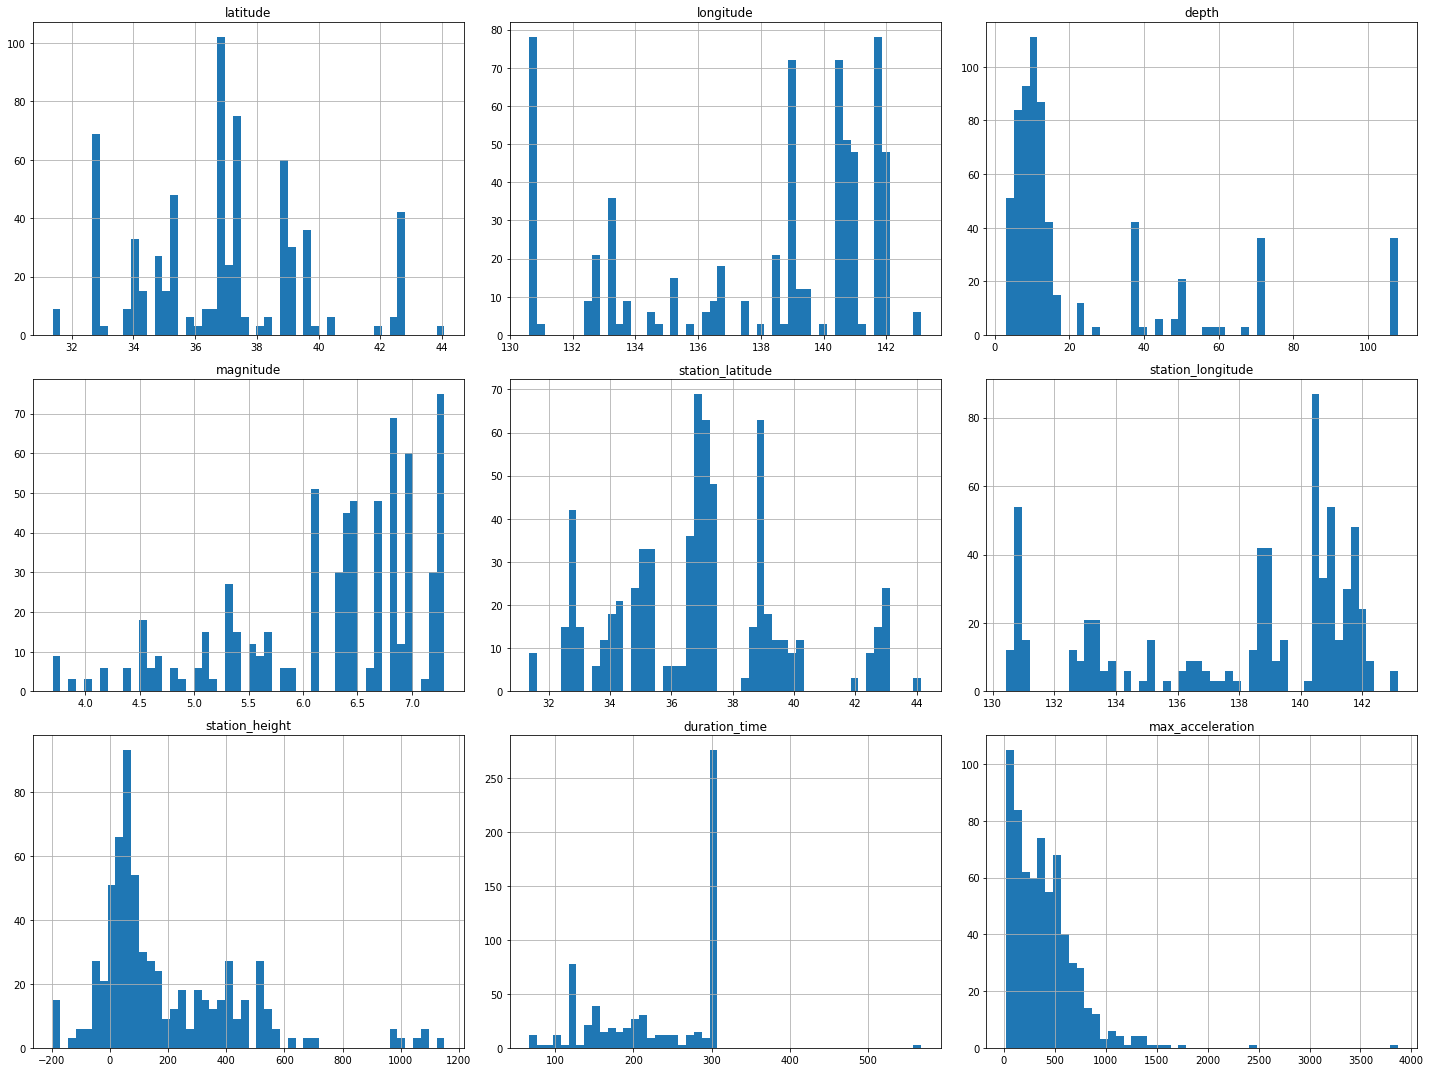

In [12]:
# we can also check the summary by plotting a histogram for all the attrs


# Where to save the figures
PROJECT_ROOT_DIR = "."
NAME = "kik_knet"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", NAME)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

%matplotlib inline
import matplotlib.pyplot as plt
earthquake.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

<AxesSubplot:xlabel='station_longitude', ylabel='station_latitude'>

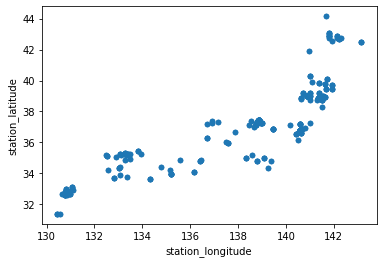

In [13]:
# view geolocation data
earthquake.plot(
    kind="scatter",
    x="station_longitude",
    y="station_latitude",
    alpha=1.0
)

Saving figure magnitude_acceration_scatterplot


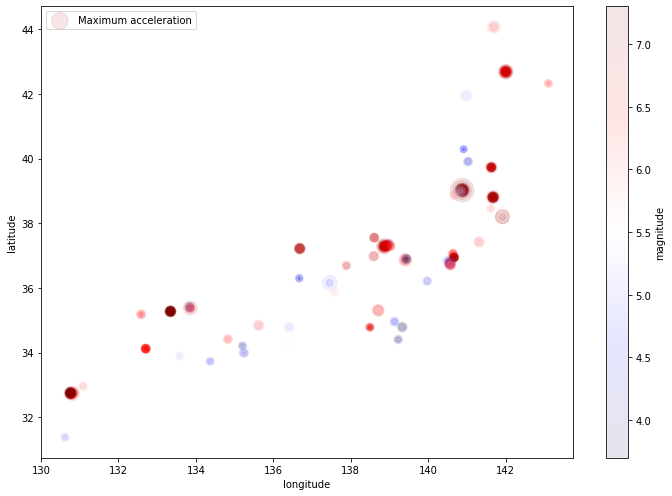

In [14]:
earthquake.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.1,
    s=earthquake['max_acceleration']/7, label="Maximum acceleration",
    figsize=(10,7), c="magnitude", cmap=plt.get_cmap('seismic'), colorbar=True,
    sharex=False)
plt.legend()
save_fig("magnitude_acceration_scatterplot")

Saving figure japan_magnitude_acceration_scatterplot


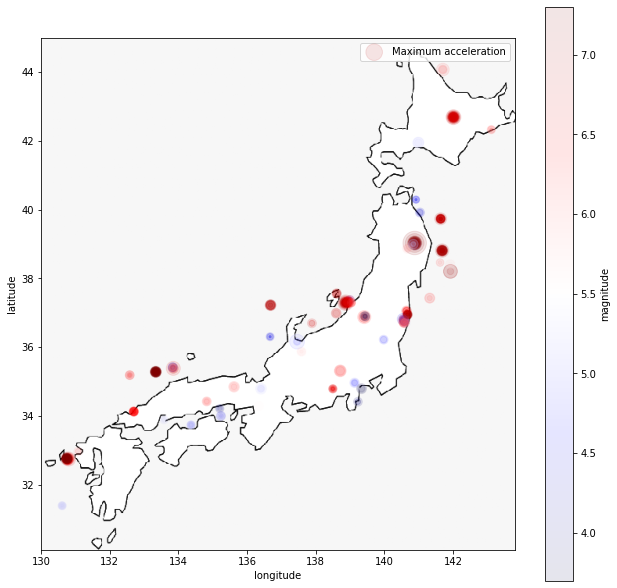

In [15]:
PROJECT_ROOT_DIR = "."
NAME = "kik_knet"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", NAME)
os.makedirs(IMAGES_PATH, exist_ok=True)
filename = 'japan2.png'

import matplotlib.image as mpimg
japan_img=mpimg.imread(os.path.join(IMAGES_PATH, filename))
earthquake.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.1,
    s=earthquake['max_acceleration']/7, label="Maximum acceleration",
    figsize=(9,8.5), c="magnitude", cmap=plt.get_cmap('seismic'), colorbar=True,
    sharex=False)

plt.imshow(japan_img, extent=[130, 143.8, 30.1, 45], alpha=1.0,
           cmap=plt.get_cmap("seismic"))
plt.legend()
save_fig("japan_magnitude_acceration_scatterplot")

# create and visualise near source and far source data

## far source example:
##### station: IWTH21
##### date: 2008/07/24 00:26:00
##### depth: 108km
##### magnitude: 6.8

## near source example:
##### station: TCGH07
##### date: 2012/12/17 18:48:00
##### depth: 3km
##### magnitude: 3.7

In [40]:
import math

def create_data(folder_path):
    all_files_data = []
    strong_motion_data = []
    for path, directories, files in os.walk(folder_path):
        for file in files:
            if 'ps' in file: continue
            file_path = f'{path}/{file}'
            file_data = get_file_data(file_path)
            scale_factor = (file_data['scale_factor']).split('(gal)/')
            file_data['scale_factor'] = float(int(scale_factor[0])/int(scale_factor[1]))
            all_files_data.append(file_data)

    fname = folder_path.split('/')[-1]
    fpath = f'{ALL_DATA_PATH}/{fname}.csv'

    attrs = [
        'time (s)',
        'NS1_data',
        # 'NS1_scale_factor',
        'EW1_data',
        # 'EW1_scale_factor',
        'UD1_data',
        # 'UD1_scale_factor',
        'NS2_data',
        # 'NS2_scale_factor',
        'EW2_data',
        # 'EW2_scale_factor',
        'UD2_data',
        # 'UD2_scale_factor',
    ]
    channel_map = {
        '1': 'NS1', '2': 'EW1', '3': 'UD1',
        '4': 'NS2', '5': 'EW2', '6': 'UD2'
    }
    zero, one, two, three, four, five = all_files_data
    sf_zero, cn_zero = zero['scale_factor'], zero['channel_number']
    sf_one, cn_one = one['scale_factor'], one['channel_number']
    sf_two, cn_two = two['scale_factor'], two['channel_number']
    sf_three, cn_three = three['scale_factor'], three['channel_number']
    sf_four, cn_four = four['scale_factor'], four['channel_number']
    sf_five, cn_five = five['scale_factor'], five['channel_number']

    freq = int(zero['sampling_frequency'].split('Hz')[0])

    for idx in range(len(zero['strong_motion_data'])):
        d = {
            'time (s)': float(idx/freq),
            f'{channel_map[cn_zero]}_data': int(zero['strong_motion_data'][idx]) * sf_zero,
            # f'{channel_map[cn_zero]}_scale_factor': sf_zero,
            f'{channel_map[cn_one]}_data': int(one['strong_motion_data'][idx]) * sf_one,
            # f'{channel_map[cn_one]}_scale_factor': sf_one,
            f'{channel_map[cn_two]}_data': int(two['strong_motion_data'][idx]) * sf_two,
            # f'{channel_map[cn_two]}_scale_factor': sf_two,
            f'{channel_map[cn_three]}_data': int(three['strong_motion_data'][idx]) * sf_three,
            # f'{channel_map[cn_three]}_scale_factor': sf_three,
            f'{channel_map[cn_four]}_data': int(four['strong_motion_data'][idx]) * sf_four,
            # f'{channel_map[cn_four]}_scale_factor': sf_four,
            f'{channel_map[cn_five]}_data': int(five['strong_motion_data'][idx]) * sf_five,
            # f'{channel_map[cn_five]}_scale_factor': sf_five,
        }
        strong_motion_data.append(d)

    create_csv(fpath, attrs, strong_motion_data)


folders = [
    f'{cwd + RAW_DATA_PATH}/IWTH210807240026',
    f'{cwd + RAW_DATA_PATH}/TCGH071212171848'
]
# for f in folders:
#     create_data(f)

In [17]:
# load far source data
iwth_far_source = load_kiknet_data(f'{cwd}{ALL_DATA_PATH}/IWTH210807240026.csv')
iwth_far_source.head()

/home/adebowale/code/proj/kik_knet_data/all_data/IWTH210807240026.csv


,time (s),NS1_data,EW1_data,UD1_data,NS2_data,EW2_data,UD2_data
0,0,-3.099968,-11.831910,-12.046325,11.090826,-7.788798,-12.562064
1,0,-3.100445,-11.832863,-12.045372,11.101625,-7.792609,-12.556347
2,0,-3.100921,-11.831434,-12.045372,11.104166,-7.787527,-12.555712
3,0,-3.100921,-11.831434,-12.045849,11.097178,-7.782445,-12.558888
4,0,-3.099968,-11.832863,-12.045849,11.097178,-7.789433,-12.564605


In [18]:
iwth_far_source["NS"] = (iwth_far_source["NS1_data"] + iwth_far_source["NS2_data"])/2
iwth_far_source["EW"] = (iwth_far_source["EW1_data"] + iwth_far_source["EW2_data"])/2
iwth_far_source["UD"] = (iwth_far_source["UD1_data"] + iwth_far_source["UD2_data"])/2

In [19]:
iwth_far_source.tail()

,time (s),NS1_data,EW1_data,UD1_data,NS2_data,EW2_data,UD2_data,NS,EW,UD
20395,203,-3.039455,-11.910053,-12.043943,11.154986,-7.981914,-12.771697,4.057765,-9.945983,-12.407820
20396,203,-3.025637,-11.911006,-12.022025,11.238839,-8.140091,-12.625589,4.106601,-10.025548,-12.323807
20397,203,-3.014202,-11.897664,-12.027743,11.410357,-8.136914,-12.411510,4.198077,-10.017289,-12.219626
20398,203,-3.025637,-11.882417,-12.041084,11.566628,-7.919024,-12.450261,4.270495,-9.900720,-12.245672
20399,203,-3.027067,-11.891946,-12.038225,11.524702,-7.808490,-12.575405,4.248817,-9.850218,-12.306815


<AxesSubplot:xlabel='time (s)'>

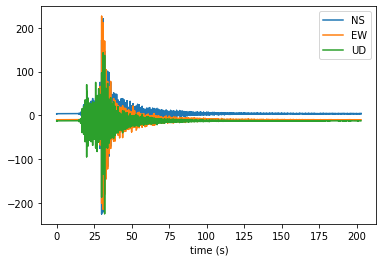

In [20]:
ax = plt.gca()
iwth_far_source.plot( x = 'time (s)' , y = 'NS', ax = ax )
iwth_far_source.plot( x = 'time (s)' , y = 'EW', ax = ax )
iwth_far_source.plot( x = 'time (s)' , y = 'UD', ax = ax )

<AxesSubplot:xlabel='time (s)'>

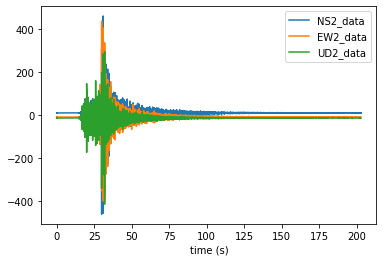

In [28]:
ax = plt.gca()
iwth_far_source.plot( x = 'time (s)' , y = 'NS2_data', ax = ax )
iwth_far_source.plot( x = 'time (s)' , y = 'EW2_data', ax = ax )
iwth_far_source.plot( x = 'time (s)' , y = 'UD2_data', ax = ax )

In [21]:
# load near source data
tcgh_near_source = load_kiknet_data(f'{cwd}{ALL_DATA_PATH}/TCGH071212171848.csv')
tcgh_near_source.head()

/home/adebowale/code/proj/kik_knet_data/all_data/TCGH071212171848.csv


,time (s),NS1_data,EW1_data,UD1_data,NS2_data,EW2_data,UD2_data
0,0,87.323709,74.728957,40.898042,14.116521,5.246528,10.324715
1,0,87.323709,74.729433,40.897089,14.119062,5.242081,10.325350
2,0,87.323232,74.729433,40.897089,14.120332,5.242716,10.327891
3,0,87.323232,74.729433,40.898042,14.115250,5.246528,10.329161
4,0,87.323232,74.729433,40.898042,14.108262,5.249704,10.327891


In [22]:
tcgh_near_source["NS"] = (tcgh_near_source["NS1_data"] + tcgh_near_source["NS2_data"])/2
tcgh_near_source["EW"] = (tcgh_near_source["EW1_data"] + tcgh_near_source["EW2_data"])/2
tcgh_near_source["UD"] = (tcgh_near_source["UD1_data"] + tcgh_near_source["UD2_data"])/2

In [23]:
tcgh_near_source.tail()

,time (s),NS1_data,EW1_data,UD1_data,NS2_data,EW2_data,UD2_data,NS,EW,UD
11995,119,87.399469,74.770410,40.904712,14.179410,5.285913,10.323444,50.789440,40.028162,25.614078
11996,119,87.403281,74.763263,40.907571,14.176869,5.283372,10.306928,50.790075,40.023318,25.607250
11997,119,87.403281,74.769934,40.907571,14.160988,5.289725,10.322174,50.782134,40.029829,25.614873
11998,119,87.398039,74.770887,40.904712,14.168611,5.298618,10.337420,50.783325,40.034753,25.621066
11999,119,87.401375,74.762310,40.906142,14.173693,5.297348,10.323444,50.787534,40.029829,25.614793


<AxesSubplot:xlabel='time (s)'>

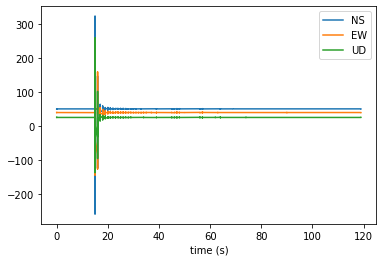

In [24]:
ax = plt.gca()
tcgh_near_source.plot( x = 'time (s)' , y = 'NS', ax = ax )
tcgh_near_source.plot( x = 'time (s)' , y = 'EW', ax = ax )
tcgh_near_source.plot( x = 'time (s)' , y = 'UD', ax = ax )

In [25]:
# channel_map = {
#         '1': 'NS1', '2': 'EW1', '3': 'UD1',
#         '4': 'NS2', '5': 'EW2', '6': 'UD2'
#     }
max_acc = {
    'NS1_data': 145.98,
    'NS2_data': 630.67,
    'EW1_data': 127.51,
    'EW2_data': 338.28,
    'UD1_data': 81.6,
    'UD2_data': 520.08
}
def normalise(name):
    col = tcgh_near_source[name]
    mn, mx = col.min(), col.max()
    z = (col - mn) / (mx - mn)
    return z * max_acc[name]

tcgh_near_source["NNS1"] = normalise("NS1_data")
tcgh_near_source["NEW1"] = normalise("EW1_data")
tcgh_near_source["NUD1"] = normalise("UD1_data")
tcgh_near_source["NNS2"] = normalise("NS2_data")
tcgh_near_source["NEW2"] = normalise("EW2_data")
tcgh_near_source["NUD2"] = normalise("UD2_data")

tcgh_near_source["NNS"] = (tcgh_near_source["NNS1"] + tcgh_near_source["NNS2"])/2
tcgh_near_source["NEW"] = (tcgh_near_source["NEW1"] + tcgh_near_source["NEW2"])/2
tcgh_near_source["NUD"] = (tcgh_near_source["NUD1"] + tcgh_near_source["NUD2"])/2

<AxesSubplot:xlabel='time (s)'>

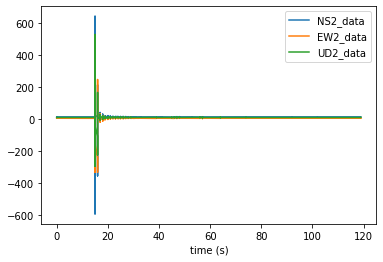

In [26]:
ax = plt.gca()
# tcgh_near_source.plot( x = 'time (s)' , y = 'NS1_data', ax = ax )
# tcgh_near_source.plot( x = 'time (s)' , y = 'EW1_data', ax = ax )
# tcgh_near_source.plot( x = 'time (s)' , y = 'UD1_data', ax = ax )
tcgh_near_source.plot( x = 'time (s)' , y = 'NS2_data', ax = ax )
tcgh_near_source.plot( x = 'time (s)' , y = 'EW2_data', ax = ax )
tcgh_near_source.plot( x = 'time (s)' , y = 'UD2_data', ax = ax )

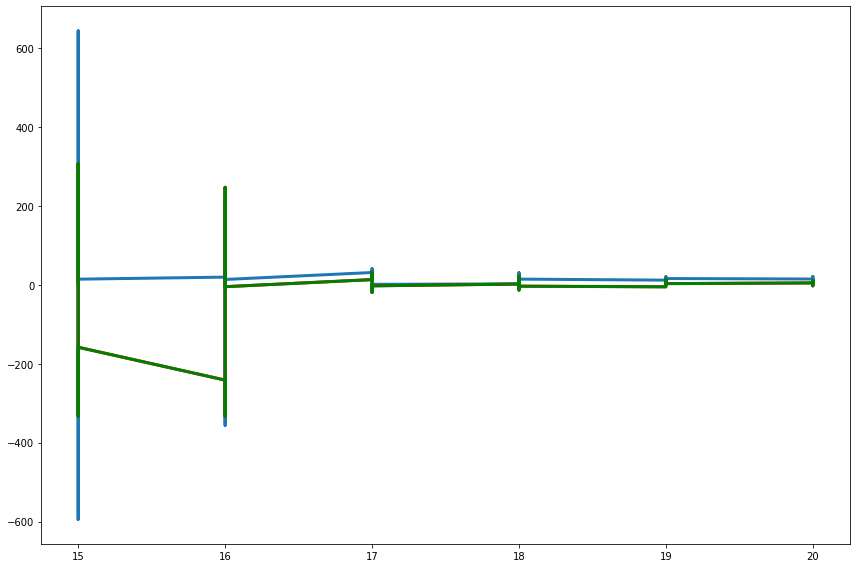

In [39]:
tcgh_range = tcgh_near_source.loc[(tcgh_near_source['time (s)'] >= 15) & (tcgh_near_source['time (s)'] <= 20)]
# ax = plt.gca()
# tcgh_range.plot( x = 'time (s)' , y = 'NS2_data')
# tcgh_range.plot( x = 'time (s)' , y = 'EW2_data')
# tcgh_range.plot( x = 'time (s)' , y = 'UD2_data')
fig = plt.figure(figsize=(12, 8))
plt.plot(tcgh_range['time (s)'], tcgh_range['NS2_data'], label='NS2_data', linewidth=3)
plt.plot(tcgh_range['time (s)'], tcgh_range['EW2_data'], label='EW2_data', linewidth=3, color='red')
plt.plot(tcgh_range['time (s)'], tcgh_range['EW2_data'], label='UD2_data', linewidth=3, color='green')
plt.tight_layout()

# Display plot

plt.show()